# Comparing performance of conventional models

## Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Load dataset

In [3]:
df = pd.read_csv('ScamDataset.csv', delimiter=',', names=['message', 'Label'])
df.head()

,message,Label
0,"Go until jurong point, crazy.. Available only ...",normal
1,Ok lar... Joking wif u oni...,normal
2,Free entry in 2 a wkly comp to win FA Cup fina...,fraud
3,U dun say so early hor... U c already then say...,normal
4,"Nah I don't think he goes to usf, he lives aro...",normal


In [ ]:

# Preprocess messages
nltk.download('punkt')
nltk.download('stopwords')


# Displaying the shape of the dataset before removing duplicates
original_shape = df.shape

# Removing duplicate rows
data = df.drop_duplicates()

# Shape after removing duplicates
new_shape = data.shape

original_shape, new_shape

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    stemmed = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(stemmed)

data['processed_message'] = data['message'].apply(preprocess)
data['processed_message']

data['Label'] = data['Label'].map({'normal': 0, 'fraud': 1})
data['Label']


# Count the number of 'fraud' entries
fraud_count = (data['Label'] == 1).sum()
non_fraud_count = (data['Label'] == 0).sum()
print(f'Number of fraud data: {fraud_count}')
print(f'Number of non fraud data: {non_fraud_count}')

In [14]:
# Vectorize messages
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['processed_message']).toarray()

y = data['Label']

In [15]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:


# Initialize an empty dictionary to store accuracies
accuracies = {}

#Initialize an empty dictionary to store evaluation metrics
evaluation_results = {}


# Initialize an empty dictionary to store loss
loss = {}

In [17]:
# Function to evaluate model
def evaluate_model(name, model, X_test, y_test):
    if name == 'LSTM':
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    evaluation_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    print(f"{name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

In [18]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model('Naive Bayes', model, X_test, y_test)
# accuracy = accuracy_score(y_test, y_pred)
# accuracies['NB'] = accuracy
# print(f"Naive Bayes Accuracy: {accuracy:.4f}")
# print("Classification Report:\n", classification_report(y_test, y_pred))



Naive Bayes Evaluation:
Accuracy: 0.9712
Precision: 0.9510
Recall: 0.8903
F1-Score: 0.9196
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1727
           1       0.95      0.89      0.92       392

    accuracy                           0.97      2119
   macro avg       0.96      0.94      0.95      2119
weighted avg       0.97      0.97      0.97      2119

Confusion Matrix:
[[1709   18]
 [  43  349]]




In [19]:
from sklearn.svm import SVC

#SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model('SVM', model, X_test, y_test)

# accuracy = accuracy_score(y_test, y_pred)
# accuracies['SVC'] = accuracy
# print(f"SVC: {accuracy:.4f}")
# print("Classification Report:\n", classification_report(y_test, y_pred))


SVM Evaluation:
Accuracy: 0.9802
Precision: 0.9704
Recall: 0.9209
F1-Score: 0.9450
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1727
           1       0.97      0.92      0.95       392

    accuracy                           0.98      2119
   macro avg       0.98      0.96      0.97      2119
weighted avg       0.98      0.98      0.98      2119

Confusion Matrix:
[[1716   11]
 [  31  361]]




In [20]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model('Random Forest', model, X_test, y_test)

# accuracy = accuracy_score(y_test, y_pred)
# accuracies['Random Forest'] = accuracy
# print(f"Random Forest Classifier: {accuracy:.4f}")
# print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Evaluation:
Accuracy: 0.9740
Precision: 0.9616
Recall: 0.8954
F1-Score: 0.9273
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1727
           1       0.96      0.90      0.93       392

    accuracy                           0.97      2119
   macro avg       0.97      0.94      0.96      2119
weighted avg       0.97      0.97      0.97      2119

Confusion Matrix:
[[1713   14]
 [  41  351]]




In [21]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model('Logistic Regression', model, X_test, y_test)

# accuracy = accuracy_score(y_test, y_pred)
# accuracies['Logistic Regression'] = accuracy
# print(f"Logistic Regression: {accuracy:.4f}")
# print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Evaluation:
Accuracy: 0.9679
Precision: 0.9737
Recall: 0.8495
F1-Score: 0.9074
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1727
           1       0.97      0.85      0.91       392

    accuracy                           0.97      2119
   macro avg       0.97      0.92      0.94      2119
weighted avg       0.97      0.97      0.97      2119

Confusion Matrix:
[[1718    9]
 [  59  333]]




In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping

# Deep Learning Model: Simple LSTM
# Tokenize text
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(data['message'])
X = tokenizer.texts_to_sequences(data['message'])
X = pad_sequences(X, maxlen=50)

# Split dataset 80:20
X_train, X_test, y_train, y_test = train_test_split(X, data['Label'], test_size=0.2, random_state=42)


# Build LSTM model
model = Sequential()
model.add(Embedding(1000, 128, input_length=50))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop], verbose=2)

# Evaluate
# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
evaluate_model('LSTM', model, X_test, y_test)
# print(f"LSTM Model Accuracy: {accuracy:.4f}")


Epoch 1/10
96/96 - 8s - loss: 0.2169 - accuracy: 0.9195 - val_loss: 0.0784 - val_accuracy: 0.9764 - 8s/epoch - 82ms/step
Epoch 2/10
96/96 - 7s - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.0721 - val_accuracy: 0.9764 - 7s/epoch - 76ms/step
Epoch 3/10
96/96 - 7s - loss: 0.0375 - accuracy: 0.9903 - val_loss: 0.0666 - val_accuracy: 0.9779 - 7s/epoch - 75ms/step
Epoch 4/10
96/96 - 7s - loss: 0.0284 - accuracy: 0.9925 - val_loss: 0.0660 - val_accuracy: 0.9808 - 7s/epoch - 75ms/step
Epoch 5/10
96/96 - 7s - loss: 0.0230 - accuracy: 0.9934 - val_loss: 0.0636 - val_accuracy: 0.9779 - 7s/epoch - 76ms/step
Epoch 6/10
96/96 - 7s - loss: 0.0192 - accuracy: 0.9944 - val_loss: 0.0699 - val_accuracy: 0.9808 - 7s/epoch - 75ms/step
Epoch 7/10
96/96 - 7s - loss: 0.0143 - accuracy: 0.9962 - val_loss: 0.0865 - val_accuracy: 0.9749 - 7s/epoch - 75ms/step
Epoch 8/10
96/96 - 7s - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.0730 - val_accuracy: 0.9749 - 7s/epoch - 75ms/step
Epoch 8: early stopping
53/53 [=

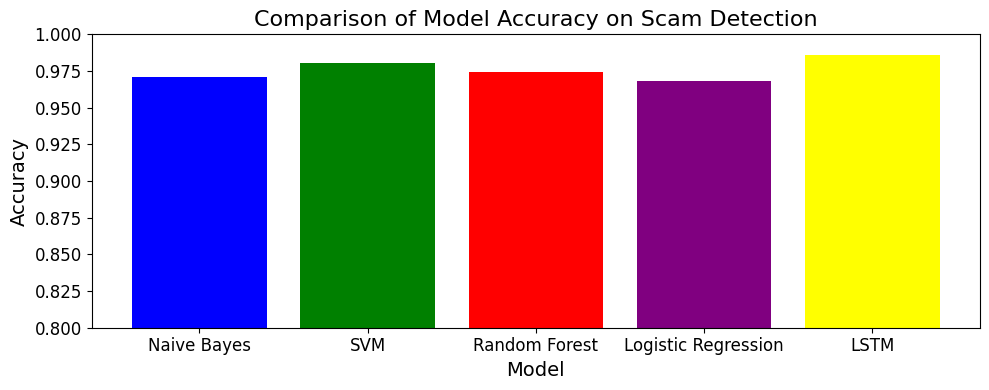

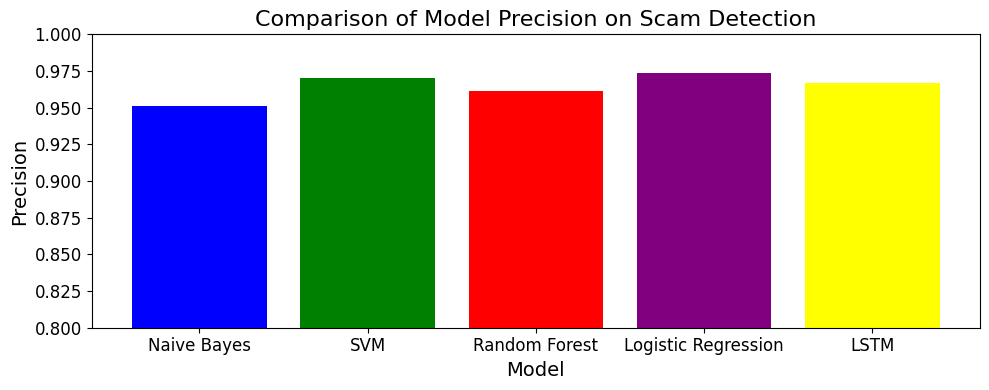

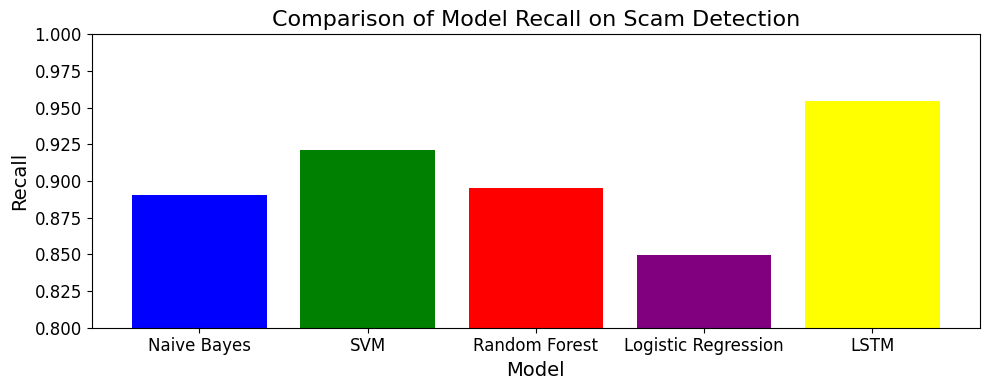

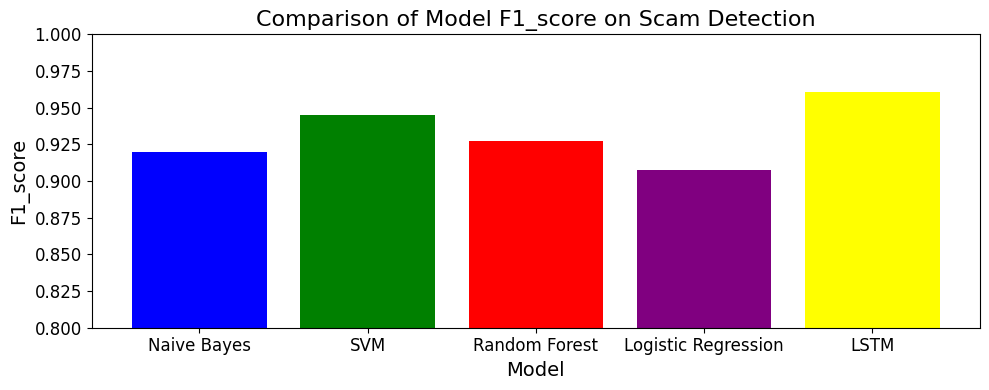

In [27]:
import matplotlib.pyplot as plt

# Plot the evaluation metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for metric in metrics:
    plt.figure(figsize=(10, 4))
    plt.bar(evaluation_results.keys(), [evaluation_results[model][metric] for model in evaluation_results], color=['blue', 'green', 'red', 'purple', 'yellow'])
    plt.xlabel('Model', fontsize=14)
    plt.ylabel(metric.capitalize(), fontsize=14)
    plt.title(f'Comparison of Model {metric.capitalize()} on Scam Detection', fontsize=16)
    plt.ylim(0.8, 1)  # Set y-axis limit to make differences more distinct
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()